In [ ]:
#1. Import dataset and display first 5 rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("TvMarketing.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# Check data types of columns
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 3. Check the shape of the DataFrame
print("\nShape of the DataFrame (rows, columns):", df.shape)



Shape of the DataFrame (rows, columns): (200, 2)


In [10]:
# 4. Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


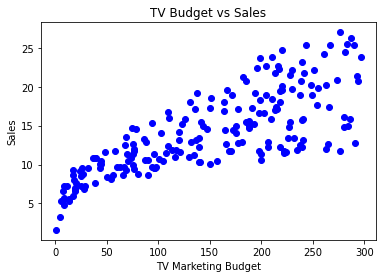

In [3]:
# 5. Visualize relationship using scatterplot
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("TV Budget vs Sales")
plt.show()

In [5]:
# 6. Prepare X (feature) and y (target)
X = df[['TV']].values  # Independent variable (2D array for sklearn 
#df.iloc[:,:-1]
#df.iloc[:,-1]
y = df['Sales'].values  # Dependent variable
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [9]:
# 7. Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# 8. Print the shape of train and test data
print("\nTraining data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)



Training data shape: (140, 1) (140,)
Testing data shape: (60, 1) (60,)


In [15]:
# 9. Perform Linear Regression (Manually)
# Calculate coefficients using the least squares formula
X_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)
numerator = np.sum((X_train - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train - X_train_mean) ** 2)
b1 = numerator / denominator  # Slope
b0 = y_train_mean - b1 * X_train_mean  # Intercept

print("\nManually Calculated Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)


Manually Calculated Coefficients:
Intercept (b0): 14.497142857142856
Slope (b1): 1.4640088547120868e-17


In [16]:
# 10. Make predictions on test data using manual regression model
y_pred_manual = b0 + b1 * X_test



In [17]:
# 11. Perform Linear Regression using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# 12. Print intercept and coefficients
print("\nSklearn Model Coefficients:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Sklearn Model Coefficients:
Intercept: 7.239459830751138
Slope: 0.046407802128152764


In [19]:
# 13. Make predictions using sklearn model
y_pred_sklearn = model.predict(X_test)

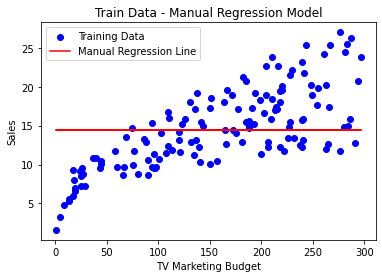

In [20]:
# 14. Plot train data and regression model
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_train, b0 + b1 * X_train, color='red', label="Manual Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Train Data - Manual Regression Model")
plt.legend()
plt.show()


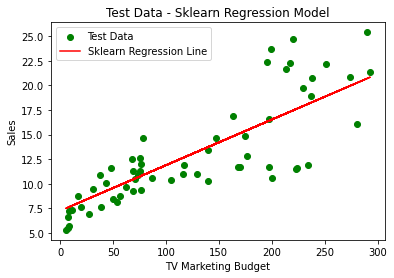

In [21]:
# 15. Plot test data and regression model
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_test, model.predict(X_test), color='red', label="Sklearn Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Test Data - Sklearn Regression Model")
plt.legend()
plt.show()


In [22]:
# 16. Calculate Mean Squared Error and R-Squared Value
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)

print("\nMean Squared Error (MSE):", mse)
print("R-Squared Value:", r2)


Mean Squared Error (MSE): 8.970991242413614
R-Squared Value: 0.6714477229302764


In [23]:
# 17. Calculate R-Squared and Adjusted R-Squared manually
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_manual) ** 2)
r2_manual = 1 - (ss_residual / ss_total)
n = len(y_test)  # Number of observations
p = 1  # Number of predictors (TV budget)
adjusted_r2 = 1 - ((1 - r2_manual) * (n - 1) / (n - p - 1))

print("\nManually Calculated R-Squared:", r2_manual)
print("Manually Calculated Adjusted R-Squared:", adjusted_r2)


Manually Calculated R-Squared: -64.50055724627033
Manually Calculated Adjusted R-Squared: -65.62987719879223
